# Importing necessary EDA libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as  sns 
from datetime import datetime

# Loading datasets 

In [3]:
# Load the datasets
df_c = pd.read_csv("Customers.csv")
df_p = pd.read_csv("Products.csv")
df_t = pd.read_csv("Transactions.csv")


# Pre-Processing datasets

### Pre-processing for Customers DataFrame

In [4]:
print("Customers DataFrame:")
print(df_c.head())  # display first few rows
print(df_c.info())  # display DataFrame info
print(df_c.describe())  # display summary statistics

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence C

In [5]:
# Check for duplicates
duplicate_rows = df_c.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


In [6]:
# Convert SignupDate to datetime
df_c['SignupDate'] = pd.to_datetime(df_c['SignupDate'])

In [7]:
print("Customers DataFrame:")
print(df_c.head())  # display first few rows
print(df_c.info())  # display DataFrame info
print(df_c.describe())  # display summary statistics

Customers DataFrame:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:0

In [8]:
signup_trend = df_c.groupby(df_c['SignupDate'].dt.year)['CustomerID'].count()
print(f"signup_trend:{signup_trend}")

signup_trend:SignupDate
2022    64
2023    57
2024    79
Name: CustomerID, dtype: int64


### Pre-processing for Products DataFrame

In [9]:
print("Products DataFrame:")
print(df_p.head())  # display first few rows
print(df_p.info())  # display DataFrame info
print(df_p.describe())  # display summary statistics

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [10]:
# Check for duplicates
duplicate_rows = df_p.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


### Pre-processing for Transactions DataFrame

In [11]:
print("Tranactions DataFrame:")
print(df_t.head())  # display first few rows
print(df_t.info())  # display DataFrame info
print(df_t.describe())  # display summary statistics

Tranactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         100

In [12]:
# Convert Transaction Date to datetime data type
df_t['TransactionDate'] = pd.to_datetime(df_t['TransactionDate'])

## Merging the all dataframes into a single dataframe .

In [13]:
# Merge the DataFrames
df = pd.merge(df_t, df_c, on="CustomerID")
df = pd.merge(df, df_p, on="ProductID")
df = df.rename(columns={'Price_y': 'Price'})
df = df.drop('Price_x', axis=1)


In [14]:
print(df.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue     CustomerName         Region SignupDate  \
0      300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36  Travis Campbell  South America 2024-04-11   
4      902.04    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category   Price  
0  ComfortLiving Bluetooth Speaker  Electronics  300.68  
1  ComfortLiving Bluetooth Speaker  Electronics  300.68  
2  ComfortLiving Bluetooth Speaker  Electron

## EDA

Customer Region Percentage:
Region
South America    30.4
North America    24.4
Europe           23.4
Asia             21.8
Name: proportion, dtype: float64


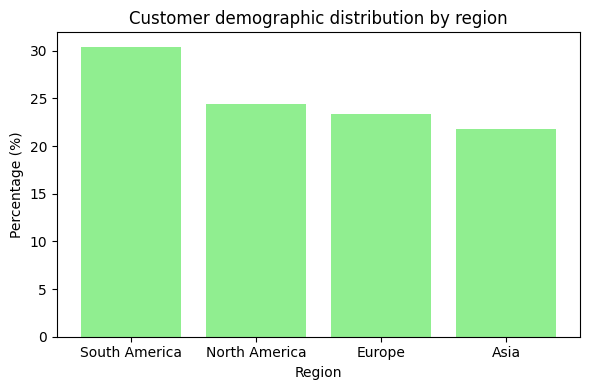

In [22]:
# Calculate percentage for each region
customer_region_percentage = (df['Region'].value_counts(normalize=True) * 100).round(2)
print(f"Customer Region Percentage:\n{customer_region_percentage}")

# Plotting as percentages
plt.figure(figsize=(6, 4))
plt.bar(customer_region_percentage.index, customer_region_percentage.values, color='lightgreen')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Customer demographic distribution by region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Most Expensive Products: 

                ProductName   Price
0          TechPro Textbook  497.76
1        BookWorld Cookbook  488.63
2         SoundWave T-Shirt  481.78
3       ActiveWear Textbook  469.77
4      SoundWave Smartwatch  459.86
5  ComfortLiving Smartphone  456.28
6     ActiveWear Smartwatch  455.72
7   ActiveWear Cookware Set  454.53
8   HomeSense Running Shoes  452.42
9    HomeSense Cookware Set  447.34


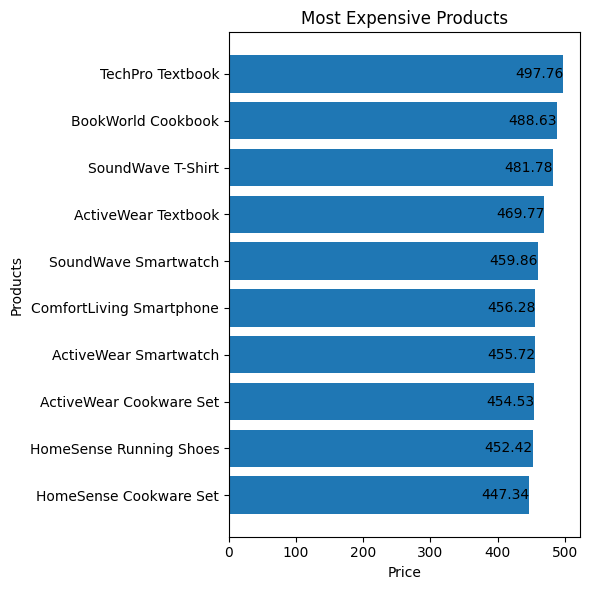

In [16]:
most_expensive_products = df.groupby('ProductName')['Price'].max().sort_values(ascending=False).head(10).reset_index()
print(f"Most Expensive Products: \n\n{most_expensive_products}")


plt.figure(figsize=(6, 6))
plt.barh(most_expensive_products.ProductName, most_expensive_products.Price)
plt.xlabel('Price')
plt.ylabel('Products')
plt.title('Most Expensive Products')
plt.gca().invert_yaxis()
for i, price in enumerate(most_expensive_products.Price):
    plt.text(price, i, str(price) ,ha='right'  , va='center')
plt.tight_layout()
plt.show()

Top Categories (Percentage):

Category
Books          27.0
Electronics    25.4
Home Decor     24.8
Clothing       22.8
Name: proportion, dtype: float64


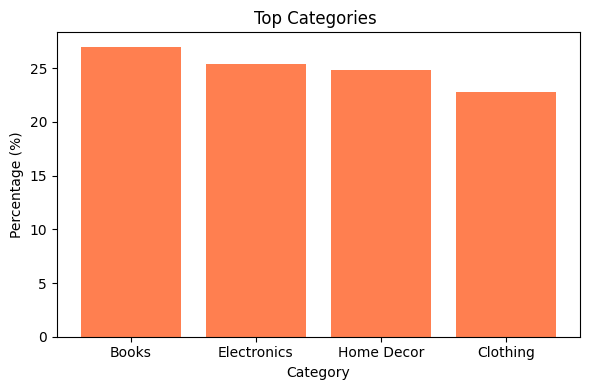

In [17]:
# Calculate percentage for each category
top_categories_percentage = (df['Category'].value_counts(normalize=True) * 100).round(2)
print(f"Top Categories (Percentage):\n\n{top_categories_percentage}")

# Plotting as percentages
plt.figure(figsize=(6, 4))
plt.bar(top_categories_percentage.index, top_categories_percentage.values, color='coral')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.title('Top Categories ')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


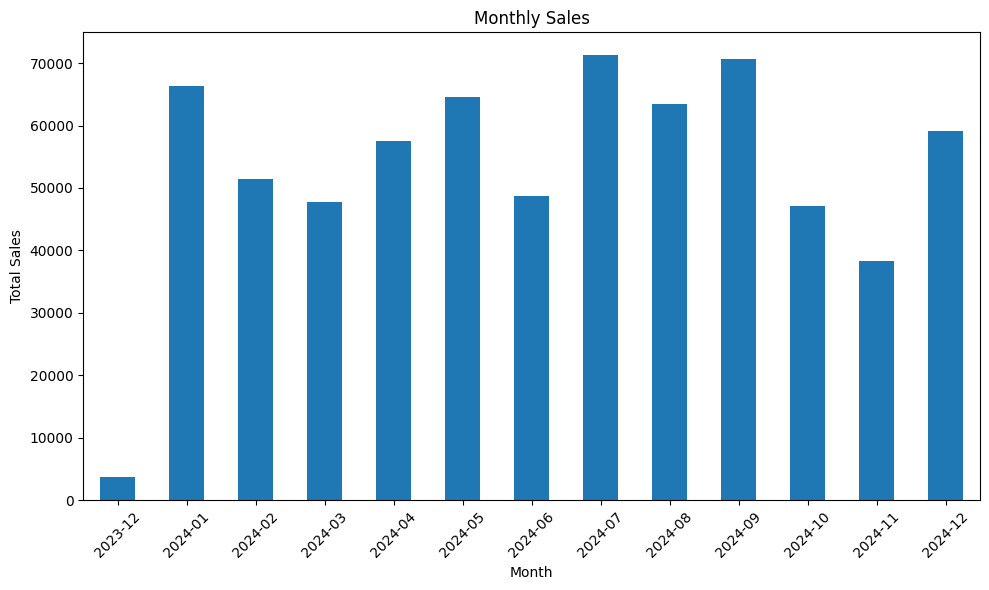

In [18]:
# Month wise sales
monthly_sales = df_t.groupby(df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print(monthly_sales)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
top_customers = df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


C:\Users\vatsa\AppData\Local\Temp\ipykernel_2876\3442813446.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_revenue = df.groupby('PriceRange')['TotalValue'].sum()


Revenue by Price Range:
PriceRange
0–50         6401.58
50–100      11941.47
100–200     70879.67
200–300    107764.60
300–400    207046.08
400–500    285962.16
500+            0.00
Name: TotalValue, dtype: float64


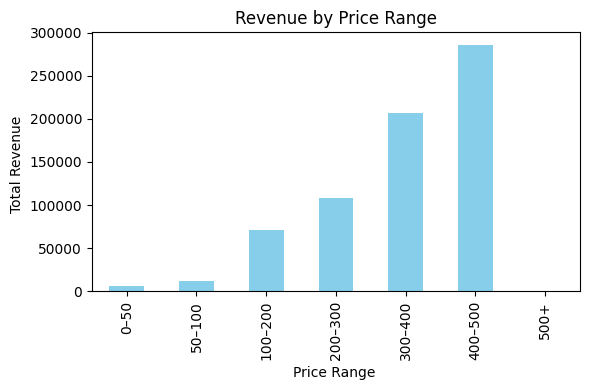

In [21]:
# Categorize products into price ranges
df['PriceRange'] = pd.cut(df['Price'], bins=[0, 50, 100, 200, 300,400,500, float('inf')], 
                          labels=['0–50', '50–100', '100–200', '200–300','300–400','400–500', '500+'])

# Calculate revenue for each price range
price_range_revenue = df.groupby('PriceRange')['TotalValue'].sum()

# Display and plot results
print(f"Revenue by Price Range:\n{price_range_revenue}")

price_range_revenue.plot(kind='bar', color='skyblue', figsize=(6, 4), xlabel='Price Range ', ylabel='Total Revenue ', title='Revenue by Price Range')
plt.tight_layout()
plt.show()


# EDA Findings Report

## 1. Customer Demographics
- **Region Distribution**:
  - South America: 30.4%
  - North America: 24.4%
  - Europe: 23.4%
  - Asia: 21.8%
- **Insight**: The majority of customers are from South America, followed by North America and Europe.

## 2. Product Analysis
- **Most Expensive Products**:
  - Top 3: 
    - TechPro Textbook: 497.76
    - BookWorld Cookbook: 488.63
    - SoundWave T-Shirt: 481.78
- **Insight**: The highest-priced product is  TechPro textbooks.

## 3. Category Distribution
- **Top Categories**:
  - Books: 27%                
  - Electronics: 25%
  - Home Decor: 24%
  - Others: 10%
- **Insight**: Books and Electronics  are the most popular categories.

## 4. Sales Analysis
- **Monthly Sales**:
  - Top 3 Months with Maximum Sales:

  - 2024-07: 71366.39
  - 2024-09: 70603.75
  - 2024-02: 66376.39
- **Insight**: There is a significant increase in sales during the feburary, july, september in year 2024.

## 5. Top Customers
- **Top 3 Customers by Total Value**:
  - Paul Parsons :  10673.87
  - Bruce Rhodes :   8040.39
  - Gerald Hines :   7663.70

- **Insight**:Paul Parsons ,Bruce Rhodes , Gerald Hines are our top 3 customers.

## 6. Revenue by Price Range
- **Price Range Distribution**:
  - 0–50: 4,601
  - 50–100: 11,941
  - 100–200: 70,876
  - 200–300: 1,07,764
  - 300–400: 2,07,046
  - 400–500: 2,85,962
- **Insight**: Higher-priced products (300–500) generate the most revenue.

# Recommendations
1. **Target Marketing**:
   - Focus marketing efforts on South America, North America, and Europe.
   - Promote high-value products during the holiday season to maximize sales.

2. **Product Strategy**:
   - Expand the range of high-priced products, especially in Books and Electronics categories.
   - Consider offering promotions or discounts on lower-priced products to boost sales in slower months.

3. **Customer Retention**:
   - Implement loyalty programs for top customers to encourage repeat purchases.
   - Analyze purchasing patterns of top customers to tailor personalized offers.

By leveraging these insights, the company can optimize its marketing strategies, product offerings, and customer engagement to drive growth and profitability.